<a href="https://colab.research.google.com/github/Anirudh2465/EEG-Motor-Imagery-Classification-of-BCI-IV-2A-dataset/blob/main/EEE_final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG Signal Classification and Analysis


---



### Installing Libraries / Modules

In [ ]:
pip install scipy numpy pydmd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.5/169.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from sklearn import svm
from pydmd import DMD
from imblearn.over_sampling import SMOTE
import scipy.stats as stats

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


##**csv**

Provides functions to read and write CSV files.     
Usage: Handling data input and output in CSV format.


##**imblearn.over_sampling**

SMOTE: Synthetic Minority Over-sampling Technique.
Usage: Handling class imbalance by oversampling the minority class.


##**matplotlib.pyplot**

A plotting library for creating static, animated, and interactive visualizations.
Usage: Visualizing data.


##**numpy**

A fundamental package for scientific computing with support for large multidimensional arrays and matrices.
Usage: Numerical operations on arrays and matrices.


##**pydmd**

DMD: Dynamic Mode Decomposition algorithm.
Usage: Data-driven modeling and analysis of time series data.


##**scipy.stats**

Contains probability distributions and statistical functions.
Usage: Statistical analysis and hypothesis testing.
skew: Computes the skewness of a dataset.
kurtosis: Computes the kurtosis of a dataset.


##**seaborn**

A statistical data visualization library.
Usage: Creating attractive and informative statistical graphics.


##**sklearn.ensemble**

HistGradientBoostingClassifier: Histogram-based gradient boosting classifier.

RandomForestClassifier: Ensemble of decision trees for classification and regression tasks.

GradientBoostingClassifier: Gradient boosting classifier.

Usage: Classification tasks and improving model performance through ensemble methods.


##**sklearn.experimental**

enable_hist_gradient_boosting: Enables the experimental histogram-based gradient boosting models.

Usage: Allowing the use of experimental, faster gradient boosting models.
sklearn.metrics

classification_report: Builds a text report showing the main classification metrics.

precision_score: Computes the precision.

recall_score: Computes the recall.

f1_score: Computes the F1 score.

accuracy_score: Computes the accuracy.

confusion_matrix: Computes the confusion matrix.

Usage: Evaluating the performance of classification models.


##**sklearn.model_selection**

train_test_split: Splits arrays or matrices into random train and test subsets.

Usage: Dividing the dataset into training and testing sets.


##**sklearn.preprocessing**

StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

Usage: Normalizing the feature set.


##**sklearn.tree**

DecisionTreeClassifier: A decision tree classifier.

Usage: Classification tasks through decision rules inferred from the data features.


##**sklearn**

svm: Support Vector Machine algorithms.

Usage: Classification, regression, and outlier detection tasks.

#**Functions**


##**Part I –Getting Data**

The CSV file containing all the data for all 22 channels was read and the data was collected based on the type of motion the human body performed during that time.

In [ ]:
def get_data(val_for_data):
  f = open(f"/content/BCICIV_2a_{val_for_data}.csv","r")
  R = csv.reader(f)
  R = list(R)[1:]
  f.close()
  return R

In [ ]:
def get_types(Data_values):
  d={}
  for i in range(len(Data_values)):
    if Data_values[i][2] in d:
      d[Data_values[i][2]]+=1
    else:
      d[Data_values[i][2]] = 1
  return d

In [ ]:
def get_channels_times(data_values,type_data):
  r = data_values
  times=[]
  channel1=[]
  channel2=[]
  channel3=[]
  channel4=[]
  channel5=[]
  channel6=[]
  channel7=[]
  channel8=[]
  channel9=[]
  channel10=[]
  channel11=[]
  channel12=[]
  channel13=[]
  channel14=[]
  channel15=[]
  channel16=[]
  channel17=[]
  channel18=[]
  channel19=[]
  channel20=[]
  channel21=[]
  channel22=[]
  for i in range(len(r)):
    if r[i][2]==type_data:
      times.append(float(r[i][1]))
      channel1.append(float(r[i][4]))
      channel2.append(float(r[i][5]))
      channel3.append(float(r[i][6]))
      channel4.append(float(r[i][7]))
      channel5.append(float(r[i][8]))
      channel6.append(float(r[i][9]))
      channel7.append(float(r[i][10]))
      channel8.append(float(r[i][11]))
      channel9.append(float(r[i][12]))
      channel10.append(float(r[i][13]))
      channel11.append(float(r[i][14]))
      channel12.append(float(r[i][15]))
      channel13.append(float(r[i][16]))
      channel14.append(float(r[i][17]))
      channel15.append(float(r[i][18]))
      channel16.append(float(r[i][19]))
      channel17.append(float(r[i][20]))
      channel18.append(float(r[i][21]))
      channel19.append(float(r[i][22]))
      channel20.append(float(r[i][23]))
      channel21.append(float(r[i][24]))
      channel22.append(float(r[i][25]))
  channel_data=[channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,channel10,channel11,channel12,channel13,channel14,channel15,channel16,channel17,channel18,channel19,channel20,channel21,channel22]
  return feature_extraction(type_data,channel_data,times)

In [ ]:
def feature_extraction(type_data,channel_data,times):
  features=[]
  labels=[]
  for i in range(0,len(times),201):
    start = i
    stop = i+201
    l = []
    for j in range(22):
      channel_val = channel_data[j]
      segment = channel_val[start:stop]
      mean=np.mean(segment)
      std = np.std(segment)
      skewness = skew(segment)
      kurt = kurtosis(segment)
      maxval = max(segment)
      minval = min(segment)
      median = np.median(segment)
      variance = np.var(segment,ddof = 1)
      l.extend([segment])
    features.append(l)
    labels.append(type_data)
  print("len of features : " ,len(features) , " len of labels: " , len(labels))
  return features,labels

In [ ]:
def splitting(Features,Labels):
  scaler = StandardScaler()
  Features_scaled = scaler.fit_transform(Features)
  smote = SMOTE(k_neighbors=1)
  smote.fit(Features_scaled,Labels)
  val, labels = smote.fit_resample(Features,Labels)
  X_train, X_test, y_train, y_test = train_test_split(val, labels, test_size=0.1, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
def model1(X_train,X_test, y_train, y_test):
  model1 = HistGradientBoostingClassifier()
  model1.fit(X_train, y_train)
  print("Model 1 trained")

  pred1 = model1.predict(X_test)
  accuracy = np.mean(pred1 == y_test)
  print(f'Accuracy of model 1: {accuracy}')


  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, pred1, average='weighted')
  recall = recall_score(y_test, pred1, average='weighted')
  f1 = f1_score(y_test, pred1, average='weighted')

  # Print the scores
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')

  # Generate confusion matrix
  matrix = confusion_matrix(y_test, pred1)

  # Create a heatmap
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def model2(X_train, X_test, y_train, y_test):
  model2 = svm.SVC()
  model2.fit(X_train,y_train)
  print("Model 2 trained")

  pred2 = model2.predict(X_test)
  accuracy = accuracy_score(y_test, pred2)
  print(f'Accuracy of model 2: {accuracy}')


  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, pred2, average='weighted')
  recall = recall_score(y_test, pred2, average='weighted')
  f1 = f1_score(y_test, pred2, average='weighted')

  # Print the scores
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')

  # Generate confusion matrix
  matrix = confusion_matrix(y_test, pred2)
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
  plt.title("Confusion Matrix")
  plt.show()

In [ ]:
def model3(X_train, X_test, y_train, y_test):
  model3 = RandomForestClassifier()
  model3.fit(X_train,y_train)
  print("Model 3 trained")

  pred3 = model3.predict(X_test)
  accuracy = np.mean(pred3 == y_test)
  print(f'Accuracy of model 3: {accuracy}')


  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, pred3, average='weighted')
  recall = recall_score(y_test, pred3, average='weighted')
  f1 = f1_score(y_test, pred3, average='weighted')

  # Print the scores
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')

  # Generate confusion matrix
  matrix = confusion_matrix(y_test, pred3)

  # Create a heatmap
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def model4(X_train, X_test, y_train, y_test):
  model4 = DecisionTreeClassifier()
  model4.fit(X_train, y_train)


  pred4 = model4.predict(X_test)
  accuracy = np.mean(pred4 == y_test)
  print(f'Accuracy of Decision Tree model: {accuracy}')

  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, pred4, average='weighted')
  recall = recall_score(y_test, pred4, average='weighted')
  f1 = f1_score(y_test, pred4, average='weighted')

  # Print the scores
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')

  # Generate confusion matrix
  matrix = confusion_matrix(y_test, pred4)

  # Create a heatmap
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

  plt.title('Confusion Matrix for Decision Tree')
  plt.show()

## **Running of the program**

In [ ]:
Data_values = []
Files = [1]
Features = []
Labels = []
for files in Files:
  data_values = get_data(files)
  Data_values.extend(data_values)
type_data_Dict = get_types(Data_values)

for type_data in type_data_Dict:
  print(type_data)
  features,labels = get_channels_times(Data_values,type_data)
  Features.extend(features)
  Labels.extend(labels)

tongue
len of features :  72  len of labels:  72
foot
len of features :  72  len of labels:  72
right
len of features :  72  len of labels:  72
left
len of features :  72  len of labels:  72


In [ ]:
dmd = DMD(svd_rank = 0)
dmd.fit(np.array(Features))
Featuresdmd = dmd.modes.real

/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2.075955208467768e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [ ]:
L = ['tongue', 'foot', 'right', 'left']
Labelsdmd = []
for i in L:
  for j in range(len(Featuresdmd)//4):
    Labelsdmd.append(i)
Labelsdmd = np.array(Labelsdmd)

In [ ]:
X_train, X_test, y_train, y_test=splitting(Featuresdmd,Labelsdmd)

Model 1 trained
Accuracy of model 1: 0.4968454258675079
Precision: 0.5013315861551743
Recall: 0.4968454258675079
F1 Score: 0.49639448554054677


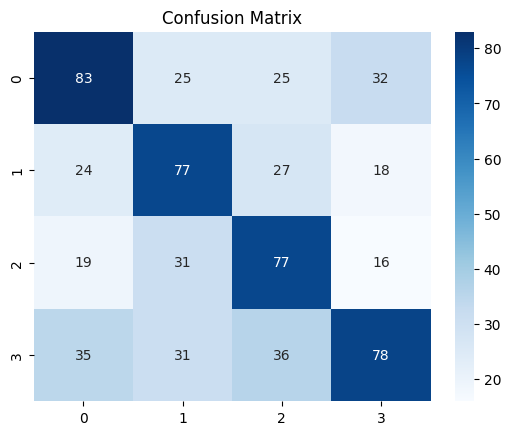

In [ ]:
model1(X_train, X_test, y_train, y_test)

Model 2 trained
Accuracy of model 2: 0.6072555205047319
Precision: 0.616446389967316
Recall: 0.6072555205047319
F1 Score: 0.6076566868968661


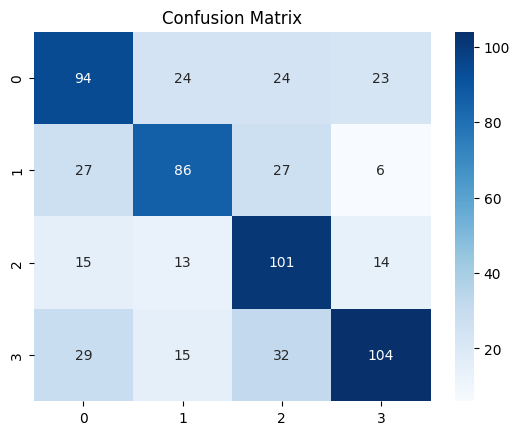

In [ ]:
model2(X_train, X_test, y_train, y_test)

Model 3 trained
Accuracy of model 3: 0.5378548895899053
Precision: 0.5485447160576142
Recall: 0.5378548895899053
F1 Score: 0.5391369361573568


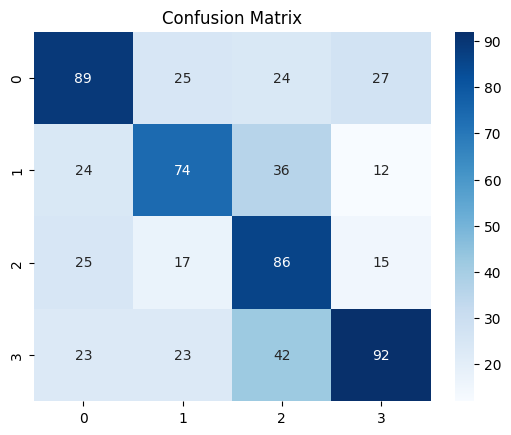

In [ ]:
model3(X_train, X_test, y_train, y_test)

Accuracy of Decision Tree model: 0.3359621451104101
Precision: 0.3362448189887882
Recall: 0.3359621451104101
F1 Score: 0.33533612945534624


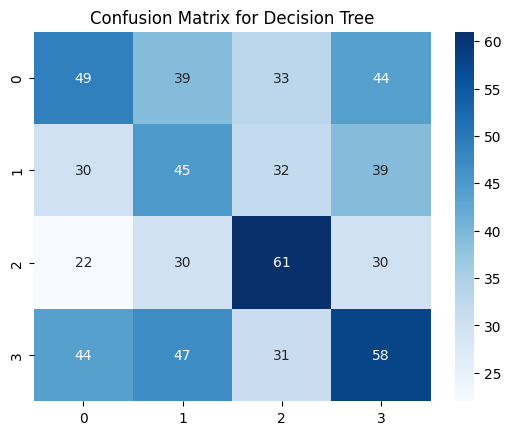

In [ ]:
model4(X_train, X_test, y_train, y_test)